In [3]:
library(metafor)
library(tidyverse)

Loading required package: Matrix

Loading required package: metadat

Loading required package: numDeriv


Loading the 'metafor' package (version 4.4-0). For an
introduction to the package please type: help(metafor)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x tidyr::pack()   masks Matrix::pack()
x tidyr::unpack() masks Matrix::unpack()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [33]:
df <- read.csv(file = 'ref_counts_summary.csv')
df

X...dataset,type,source,full,non.empty,is_equal,past,future,total,corrected_past,corrected_future,past_prop,future_prop,RR,non_past,non_future
<chr>,<chr>,<chr>,<int>,<int>,<lgl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
IMSDb,Scripted,,1091,1091,TRUE,833026,472519,3080674,657475,316525,0.2134192,0.10274537,2.0771661,2423199,2764149
Movies,Scripted,ConvoKit,304713,304446,FALSE,179729,129622,516163,127744,85937,0.2474877,0.16649198,1.4864843,388419,430226
Switchboard,Spontaneous,ConvoKit,122646,122646,TRUE,62464,32372,245461,41488,22079,0.1690207,0.08994912,1.8790706,203973,223382
SCOTUS,Constrained,ConvoKit,1700789,1700789,TRUE,3089509,1802239,3880259,1963578,1207377,0.5060430,0.31115887,1.6263172,1916681,2672882
Tennis,Constrained,ConvoKit,163948,163948,TRUE,448444,193802,599172,281669,134638,0.4700971,0.22470676,2.0920468,317503,464534
PfG,Constrained,ConvoKit,20932,20932,TRUE,9695,15520,37184,7408,9771,0.1992255,0.26277431,0.7581619,29776,27413
IQ2,Constrained,ConvoKit,26562,26317,FALSE,67626,51780,122925,46630,34811,0.3793370,0.28318894,1.3395191,76295,88114
GAP,Constrained,ConvoKit,8009,8009,TRUE,2739,1958,8009,1800,1338,0.2247472,0.16706205,1.3452915,6209,6671
Chair,Scripted,,6,6,TRUE,909,663,2900,660,460,0.2275862,0.15862069,1.4347826,2240,2440


In [80]:
dat <- escalc(measure="RR", ai=corrected_past, bi=non_past, ci=corrected_future, di=non_future, data=df,
              slab=X...dataset)
dat

X...dataset,type,source,full,non.empty,is_equal,past,future,total,corrected_past,corrected_future,past_prop,future_prop,RR,non_past,non_future,yi,vi
<chr>,<chr>,<chr>,<int>,<int>,<lgl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
IMSDb,Scripted,,1091,1091,TRUE,833026,472519,3080674,657475,316525,0.2134192,0.10274537,2.0771661,2423199,2764149,0.7310045,4.031070e-06
Movies,Scripted,ConvoKit,304713,304446,FALSE,179729,129622,516163,127744,85937,0.2474877,0.16649198,1.4864843,388419,430226,0.3964138,1.558984e-05
Switchboard,Spontaneous,ConvoKit,122646,122646,TRUE,62464,32372,245461,41488,22079,0.1690207,0.08994912,1.8790706,203973,223382,0.6307773,6.124733e-05
SCOTUS,Constrained,ConvoKit,1700789,1700789,TRUE,3089509,1802239,3880259,1963578,1207377,0.5060430,0.31115887,1.6263172,1916681,2672882,0.4863181,8.220866e-07
Tennis,Constrained,ConvoKit,163948,163948,TRUE,448444,193802,599172,281669,134638,0.4700971,0.22470676,2.0920468,317503,464534,0.7381429,7.639650e-06
PfG,Constrained,ConvoKit,20932,20932,TRUE,9695,15520,37184,7408,9771,0.1992255,0.26277431,0.7581619,29776,27413,-0.2768583,1.835463e-04
IQ2,Constrained,ConvoKit,26562,26317,FALSE,67626,51780,122925,46630,34811,0.3793370,0.28318894,1.3395191,76295,88114,0.2923107,3.390189e-05
GAP,Constrained,ConvoKit,8009,8009,TRUE,2739,1958,8009,1800,1338,0.2247472,0.16706205,1.3452915,6209,6671,0.2966107,1.053221e-03
Chair,Scripted,,6,6,TRUE,909,663,2900,660,460,0.2275862,0.15862069,1.4347826,2240,2440,0.3610133,2.999409e-03


In [35]:
res1 <- rma(yi, vi, data=dat)
res1


Random-Effects Model (k = 12; tau^2 estimator: REML)

tau^2 (estimated amount of total heterogeneity): 0.0762 (SE = 0.0326)
tau (square root of estimated tau^2 value):      0.2760
I^2 (total heterogeneity / total variability):   100.00%
H^2 (total variability / sampling variability):  20907.29

Test for Heterogeneity:
Q(df = 11) = 209989.5995, p-val < .0001

Model Results:

estimate      se    zval    pval   ci.lb   ci.ub      
  0.3653  0.0799  4.5732  <.0001  0.2087  0.5218  *** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [10]:
predict(res1, transf=exp, digits=3)


  pred ci.lb ci.ub pi.lb pi.ub 
 1.441 1.232 1.685 0.820 2.531 


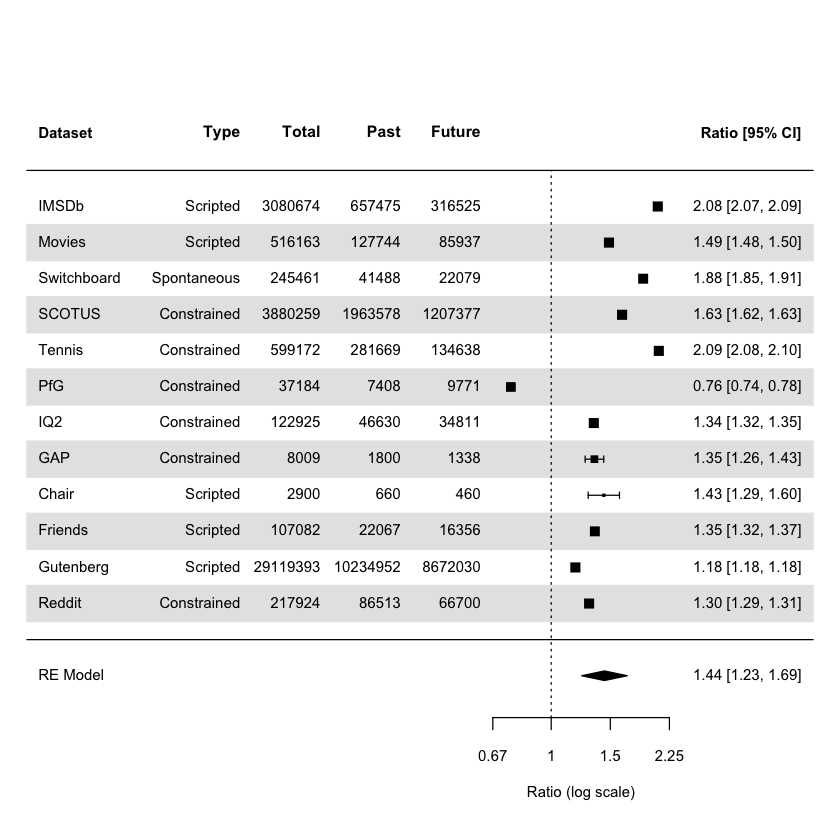

In [97]:
# pdf(file='forestplot.pdf')

forest(res1, header=c("Dataset","Ratio [95% CI]"), 
atransf=exp, 
shade=TRUE,
at=log(c(0.67, 1, 1.5, 2.25)),
ilab=cbind(type, total, corrected_past, corrected_future),
ilab.xpos=c(-2.05,-1.5,-0.95,-0.4),
cex=0.75,
xlim=c(-3.6,1.8),
# alim=c(0.5, 4),
xlab=c("Ratio (log scale)"),
ilab.pos=2)

op <- par(cex=0.8, font=2)
text(c(-2.05,-1.5,-0.95,-0.4), pos=2, res1$k+2.05, c("Type", "Total", "Past", "Future"))
par(op)

# dev.off() # Turn the PDF device off